In [1]:
import sys
sys.path.append('/Users/daiyiluo/Documents/ELEC599')
import CalHMM
import numpy as np
import matplotlib.pyplot as plt
import hmmlearn.hmm
import warnings
warnings.filterwarnings('ignore')
import imp

In [ ]:
imp.reload(CalHMM)

## a. Load data

In [2]:
folder = '/Users/daiyiluo/Downloads/KQ095_210205' #KQ086_210110' #'/Users/daiyiluo/Downloads/caiman_t/dan_CA1' #
timebin = 500

In [3]:
data = np.load(f'{folder}/timebin_{timebin}.npz') #{folder}/timebin_500.npz
Distance = data['Distance']
lap_end = data['lap_end'] #[] #
idx = data['idx']
del data

Spike = np.load(f'{folder}/timebin_{timebin}_spks.npy')

Spike.shape, Distance.shape #, idx.shape # Spike should be of shape (#sample, #neuron)

((1821, 219), (1821,))

In [ ]:
%matplotlib

In [ ]:
_, ax1 = plt.subplots()
ax1.plot(Trace[:,5], 'r', label='Trace')
ax2 = ax1.twinx()
ax2.plot(Spike[:,5]/50, label='Spike')
plt.legend()

## b. Run Poisson HMM
### Original data

In [42]:
origin = hmmlearn.hmm.PoissonHMM(n_components=20) 
origin.fit(Spike)

x1, plst1, occ1, posterior_states1, pos_COM1 = CalHMM.comp_poststates_pos(origin, Spike, Distance, sort='angle')
err_rate1, dev1, Decoded_position1 = CalHMM.comp_decoded_pos_acc(Distance, posterior_states1, pos_COM1, mode = 'circle')

print(f'Error Rate: {err_rate1}')

Error Rate: 0.18072207670096224


In [35]:
plst1[11]

16

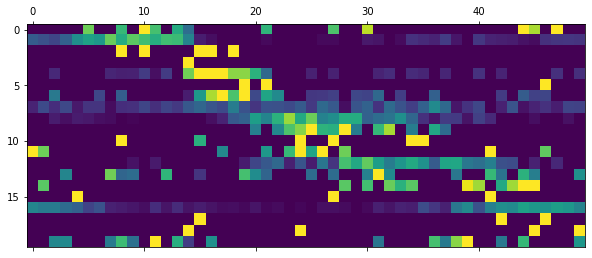

In [43]:
plt.matshow(x1,vmax=.1)

In [44]:
dec_state = np.zeros_like(posterior_states1)
for i in range(posterior_states1.shape[0]):
    dec_state[i,np.argmax(posterior_states1[i,:])]=i+1

In [45]:
dec_state.shape

(1821, 20)

In [47]:
state = dec_state.copy()
state[np.where(state!=0)]=1

Text(0.5, 0, 'time')

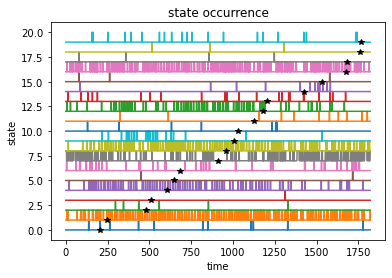

In [48]:
for i,j in enumerate(plst1):
    plt.plot(state[:,j]+i)
    plt.plot(pos_COM1[j]*1000,i,'k*')
plt.title('state occurrence')
plt.ylabel('state')
plt.xlabel('time')

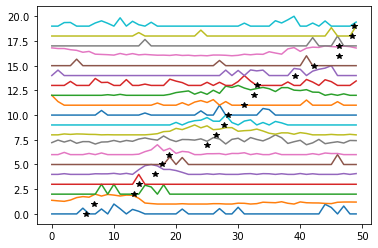

In [49]:
for i in range(20):
    plt.plot(x1[i,:]/np.max(x1[i,:])+i)
    plt.plot(pos_COM1[plst1[i]]/np.max(Distance)*50,i,'k*')

In [27]:
pos_COM1

array([0.26730955, 1.59635151, 1.534493  , 0.73000197, 0.22983062,
       0.48206299, 0.99166734, 0.78389967, 1.21764314, 0.20809613,
       0.54340876, 0.76949949, 1.60104294, 0.4896328 , 1.75636439,
       1.77580357, 0.79741392, 1.67952381, 0.09088231, 0.69993747])

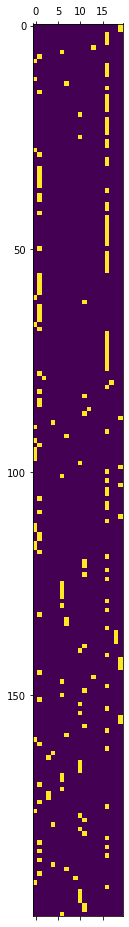

In [22]:
plt.matshow(state[:200,:])

In [ ]:
%matplotlib

------------ Directional Place Field --------------

In [ ]:
difdis = np.diff(Distance)

In [ ]:
%matplotlib

In [ ]:
from scipy.signal import savgol_filter

In [ ]:
difd = savgol_filter(difdis,15,2)

In [ ]:
gtz = np.where(difd>0)[0]

In [ ]:
e_fwd = np.where(np.diff(gtz)>1)[0]
s_fwd = np.insert(e_fwd[:-1]+1, 0, 0)

In [ ]:
for i in range(len(s_fwd)):
    if 
    np.delete()

In [ ]:
s_fwd

In [ ]:
np.delete(s_fwd,3)

In [ ]:
plt.plot(Distance)
for i in range(len(s_fwd)):
    plt.plot(gtz[s_fwd[i]:e_fwd[i]],Distance[gtz[s_fwd[i]:e_fwd[i]]])

In [ ]:
plt.figure()
plt.plot(Distance)
plt.plot(difd)
plt.plot([0,len(Distance)],[0,0])

In [ ]:
plt.plot(gtz[e_fwd],difd[gtz[e_fwd]],'*')
plt.plot(gtz[s_fwd],difd[gtz[s_fwd]],'o')

In [ ]:
plt.plot(difd,'.')

------------ End Directional Place Field --------------

In [ ]:
posterior_states1.shape

In [ ]:
plt.matshow(posterior_states1[:,plst1].T)
plt.plot(Distance/Distance.max()*20, label='position')

In [ ]:
plt.matshow(origin.transmat_)

In [ ]:
plt.matshow(x1,vmax=.3)
plt.colorbar()

In [ ]:
plt.matshow(-posterior_states1[:,plst1].T, cmap = 'gray')
plt.plot(Distance/Distance.max()*19, label='relative position')

In [ ]:
plt.xlim(800,1200)

In [ ]:
plt.xlabel('Spatial bins')
plt.ylabel('State')

In [ ]:
plt.legend(bbox_to_anchor=(.9, 1))

In [ ]:
%matplotlib inline

In [ ]:
n=plst1[8]
means=origin.means_[n,:]
thr=means.mean()+3*means.std()
nn=np.where(origin.means_[n,:]>thr)[0]
plt.plot(means)
plt.plot([0,110],[thr,thr])
plt.plot(nn, means[nn],'*')
print(nn)

In [ ]:
for i in range(20):
    print(np.where(np.argmax(posterior_states1, axis = 1)==i)[0].shape)

In [ ]:
plt.figure(figsize=(15,4))
s=np.where(np.argmax(posterior_states1, axis = 1)==i)[0]

for j,i in enumerate(nn):
    t=Spike[:,i].copy()
    t=t/np.max(t)
    plt.plot(t+j, label=f'{i}')

plt.plot(s,np.zeros_like(s),'*')
plt.legend()

In [ ]:
plt.figure()
plt.plot(x1[1,:])

In [ ]:
plt.plot(pos_COM1)
plt.plot(pos_COM1[plst1])

In [ ]:
%matplotlib

In [ ]:
plt.plot(Distance)
plt.plot(Decoded_position1)
plt.plot()

In [ ]:
plt.matshow(x1)
for i,pos in enumerate(pos_COM):
    plt.plot(np.where(d==pos)[0],i,'*')

In [ ]:
pos_COM = np.max(x1,axis=1)
pos_COM.shape

In [ ]:
d = np.unique(Distance)

In [ ]:
x, plst, occ, posterior_states, pos_COM = CalHMM.comp_poststates_pos(origin, Spike, Distance, sort='maximum')
posterior_states.shape

In [ ]:
%matplotlib

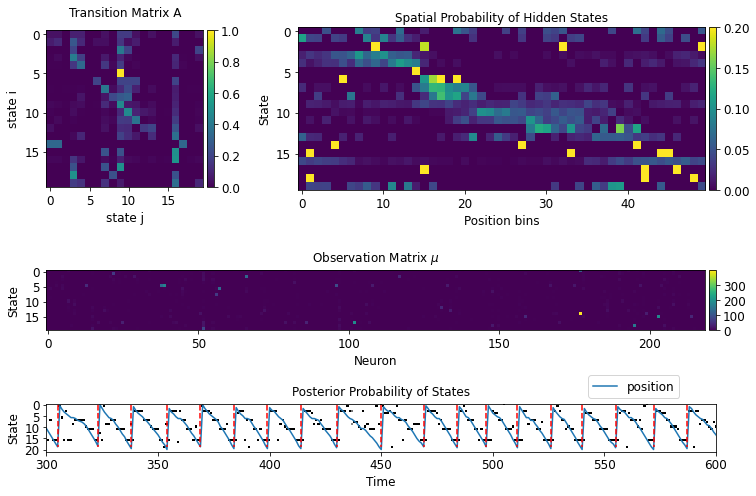

In [8]:
_, plst1, _, _, _, _ = CalHMM.show_all_plots(origin, Spike, Distance, lap_end, t_st=300, t_duration=300,vmax=.2)


In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

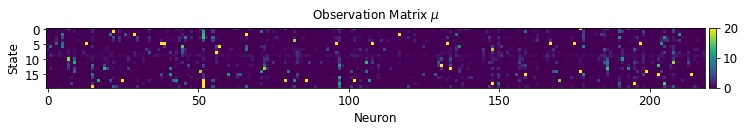

In [19]:
f, ax = plt.subplots(figsize=(12,3))
im = ax.matshow(origin.means_[plst1,:],vmax=20)
ax.set_xlabel('Neuron')
ax.set_ylabel('State')
ax.set_title(r'Observation Matrix $\mu$')
ax.xaxis.set_ticks_position('bottom')
divider = make_axes_locatable(ax)
f.colorbar(im, cax=divider.append_axes("right", size=0.1,pad=0.05))

### Time Shuffle

In [21]:
%matplotlib

Using matplotlib backend: MacOSX


In [41]:
plt.figure()
c = Spike[750:1250,:6]
ts_Spike = CalHMM.get_time_shuffle(c)
for i in range(5):
    t=c[:,i]
    t1=ts_Spike[:,i]
    plt.plot(t/np.max(t)+i,'k')
    plt.plot(t1/np.max(t1)+i,'r')

i=5
t=c[:,i]
t1=ts_Spike[:,i]
plt.plot(t/np.max(t)+i,'k', label='original')
plt.plot(t1/np.max(t1)+i,'r', label='time-shuffle')

plt.xlabel('timebin')
plt.ylabel('#neuron')
plt.title('spikes')


Text(0.5, 1.0, 'spikes')

In [42]:
plt.legend(bbox_to_anchor=(0.65, 0.95))

In [6]:
ts_Spike = CalHMM.get_time_shuffle(Spike)
ts = hmmlearn.hmm.PoissonHMM(n_components=20) 
ts.fit(ts_Spike)

x2, plst2, occ2, posterior_states2, pos_COM2 = CalHMM.comp_poststates_pos(ts, Spike, Distance)
err_rate2, dev2, Decoded_position2 = CalHMM.comp_decoded_pos_acc(Distance, posterior_states2, pos_COM2)

print(f'Error Rate: {err_rate2}')

Error Rate: 0.18760609332888886


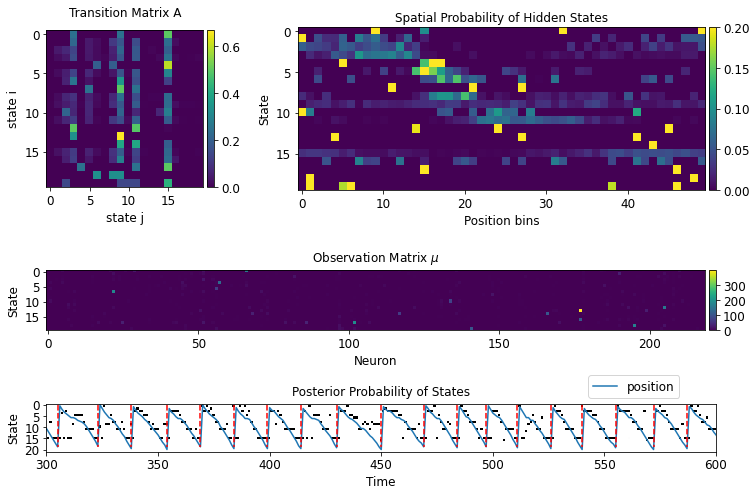

In [7]:
_, _, _, _, _, _ = CalHMM.show_all_plots(ts, Spike, Distance, lap_end, t_st=300, t_duration=300,vmax=.2)

## c. Save and Reolad

In [ ]:
save = False
if save==True:
    CalHMM.save_object(origin, f'{folder}/timebin_{timebin}_spk_origin.pkl')
    CalHMM.save_object(ts, f'{folder}/timebin_{timebin}_spk_ts.pkl')
    CalHMM.save_object(trsn, f'{folder}/timebin_{timebin}_spk_trsn.pkl')

In [ ]:
origin = CalHMM.load_object(f'{folder}/timebin_{timebin}_spk_origin.pkl')
ts = CalHMM.load_object(f'{folder}/timebin_{timebin}_spk_ts.pkl')
trsn = CalHMM.load_object(f'{folder}/timebin_{timebin}_spk_trsn.pkl')

## Check coactivation in states

In [ ]:
origin.means_.shape

In [ ]:
%matplotlib

In [ ]:
plt.matshow(origin.means_)

In [ ]:
plt.colorbar()